In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import math
eps = np.finfo(float).eps

#Question 1

In [2]:
data = pd.read_csv('classification.csv')
data.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
data.iloc[:,:-1] = (data.iloc[:,:-1] - data.iloc[:,:-1].mean(axis=0))/data.iloc[:,:-1].std(axis=0)

##1. Plot the dataset using different colors for the two classes.

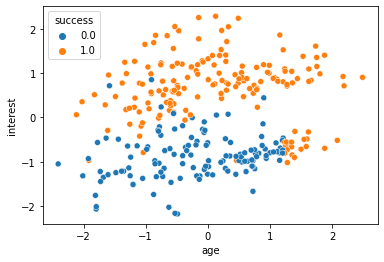

In [4]:
sns.scatterplot(data=data, x="age", y="interest", hue="success")

##2. Implement the least square method for classification and plot the decision boundary. Clearly describe your results. Is the decision boundary able to classify the points correctly?

In [5]:
def least_squares(X,Y): #inv(X'X)X'Y
    X_trans = np.transpose(X)
    temp = np.linalg.inv(np.matmul(X_trans, X))
    w_opt = np.matmul(np.matmul(temp,X_trans), Y)
    return w_opt

def modify_data(data):
    n = len(data)
    X = np.ones(n)
    X = X.reshape(n,1)
    X = np.c_[X, data]
    return X

def accuracy(Y, y_pred):
    error = 0

    for i in range(len(y_pred)):
        temp = 1
        if y_pred[i] <= 0:
            temp = 0
        error += np.abs(temp - Y[i])
    return 1 - error/len(y_pred)

In [6]:
data_X = data.iloc[:, :-1].to_numpy()
data_Y = data.iloc[:,-1].to_numpy()

#data_X = (data_X - data_X.mean(axis=0))/data_X.std(axis=0)
data_X = modify_data(data_X)
data_Y = data_Y.reshape(data_Y.shape[0], 1)
data_X.shape, data_Y.shape, type(data_X), type(data_Y)

((297, 3), (297, 1), numpy.ndarray, numpy.ndarray)

In [8]:
modi_y = np.abs(1 - data_Y)

w_opt1 = least_squares(data_X, data_Y)
w_opt2 = least_squares(data_X, modi_y)

print(w_opt1)
print(w_opt2)

[[0.56902357]
 [0.03272306]
 [0.37267031]]
[[ 0.43097643]
 [-0.03272306]
 [-0.37267031]]


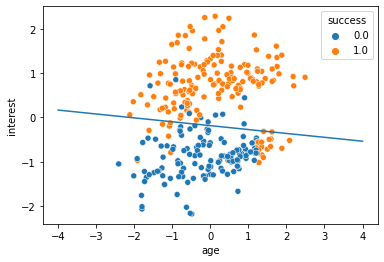

In [9]:
eff = w_opt1 - w_opt2

x = np.linspace(-4, 4)
sns.scatterplot(data=data, x="age", y="interest", hue="success")

plt.plot(x, -eff[0]/eff[2] - (eff[1]/eff[2])*x)

In [11]:
y_pred = np.dot(data_X, eff)
#y_pred
print(accuracy(data_Y, y_pred))

[0.87542088]


##3. Implement the logistic regression using gradient descent method. Choose the initial values of w in the range [−0.1, 0.1]. Plot a 3D figure depicting the sigmoid function obtained along with the same color coding of the points. Did the performance improved as compared to previous question?

In [12]:
def logistic_pred(X, w):
    w = np.array(w)
    w = w.reshape(w.shape[0], 1)
    y = np.dot(X,w)
    return 1/(1 + np.exp(-y))

def logistic_regression(X,Y):
    #X[:,1:] = (X[:,1:] - X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)

    w = np.random.uniform(-0.1,0.1, X.shape[1])
    w = w.reshape(w.shape[0],1)
    L = 0.001
    epochs = 1000

    while(epochs > 0):
         y_pred = logistic_pred(X, w)

         D = np.dot(np.transpose(X), y_pred - Y)
         
         #print(D.shape)
         w = w - L*D

         epochs = epochs - 1

    return w 

def logistic_accuracy(X, Y, w, y_pred):
    error = 0

    for i in range(len(y_pred)):
        temp = 1
        if y_pred[i] <= 0.5:
            temp = 0
        error += np.abs(temp - Y[i])
    return 1 - error/len(y_pred)

In [13]:
w_grad = logistic_regression(data_X,data_Y)
w_grad

array([[1.04656053],
       [0.698024  ],
       [3.62946602]])

In [14]:
y_pred = logistic_pred(data_X, w_grad)
#y_pred
print(logistic_accuracy(data_X, data_Y, eff, y_pred))

[0.87205387]


In [15]:
z = w_grad[0] + data_X[:,1]*w_grad[1] + data_X[:,2]*w_grad[2]
z = 1/(1+np.exp(-z))
fig = px.scatter_3d(x=data_X[:, 1].flatten(), y=data_X[:, 2].flatten(), z=data_Y.flatten(), color=data_Y.flatten())
fig.add_trace(
    go.Scatter3d(
        x=data_X[:,1].flatten(),
        y=data_X[:,2].flatten(),
        z=z,
        mode="markers")
        #line=go.scatter.Line(color="gray"),
        #showlegend=False
        
)


fig.show()

##4. Plot the decision boundary obtained for logistic regression.

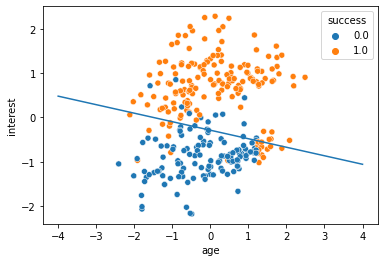

In [16]:
x = np.linspace(-4, 4)
sns.scatterplot(data=data, x="age", y="interest", hue="success")

plt.plot(x, -w_grad[0]/w_grad[2] - (w_grad[1]/w_grad[2])*x)

##5. Find the linear discriminant boundary and describe your results.

In [17]:
c1 = data_X[(data_Y == 0).flatten()]
c1 = c1[:, 1:]
c2 = data_X[(data_Y == 1).flatten()]
c2 = c2[:,1:]

u1 = c1.mean(axis=0)
u2 = c2.mean(axis=0)

S = (np.matmul(np.transpose(data_X[:, 1:]), data_X[:,1:]))/(len(data_X)-2)
S

array([[1.00338983, 0.14336046],
       [0.14336046, 1.00338983]])

In [18]:
w = np.matmul((u1-u2),np.linalg.inv(S))
b = -1/2*(np.matmul(np.matmul(u1, np.linalg.inv(S)), np.transpose(u1)) - np.matmul(np.matmul(u2, np.linalg.inv(S)), np.transpose(u2)) + np.log(len(c1)/len(c2)))
w, b

(array([-0.13253655, -1.5094078 ]), -0.02403176624613146)

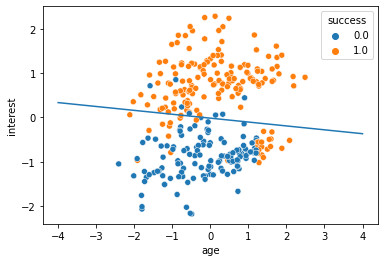

In [19]:
x = np.linspace(-4, 4)
sns.scatterplot(data=data, x="age", y="interest", hue="success")

plt.plot(x, -b/w[1] - (w[0]/w[1])*x)

In [21]:
y_pred = np.dot(data_X, [b, w[0], w[1]])
#y_pred[:10], data_Y[:10]
print(1 - accuracy(data_Y, y_pred))

[0.86868687]


##6. Logistic regression considers only linear decision boundaries. One way to go from linear decision boundaries to non-linear decision boundaries is by considering polynomial curve of higher degree. For example, if input attributes are x1, x2 then transforming it into 2 degree polynomial will give features: {x1, x2, x1^2, x2^2, x1x2, 1}. Identify an appropriate degree of the transformation that results in the optimal performance via logistic regression. Clearly explain your choice.

In [85]:
def logistic_regression_non_linear(X,Y,n):

    q = int((n**2 +3*n)/2) + 1
 

    if(n>1):
      X_temp = np.zeros((X.shape[0], q))   
      X_temp[:,0] = 1
      X_temp[:,1] = X[:,1]
      X_temp[:,2] = X[:,2]
      for i in range(2,n+1):
        X_temp[:,int((i*(i+1))/2)] = X[:,1]**i
        X_temp[:,int((i*(i+1))/2+1)] = X[:,2]**i
        for j in range(1,i):
          X_temp[:,int(((i*(i+1))/2)+1+j)] = (X[:,1]**(i-j))*(X[:,2]**j)
    else:
        X_temp = X

    #X_temp[:,1:] = (X_temp[:,1:] - X_temp[:,1:].mean(axis=0))/X_temp[:,1:].std(axis=0)

    w = np.random.uniform(-0.1,0.1, q)
    w = w.reshape(w.shape[0],1)
    L = 0.001
    epochs = 10000

    while(epochs > 0):
         y_pred = logistic_pred(X_temp, w)

         D = np.dot(np.transpose(X_temp), y_pred - Y)
         
         #print(D.shape)
         w = w - L*D

         epochs = epochs - 1

    return w, X_temp

In [ ]:
new_data = pd.read_csv('classification.csv')
new_data

In [25]:
new_data_X = new_data.iloc[:, :-1].to_numpy()
new_data_Y = new_data.iloc[:,-1].to_numpy()

#data_X = (data_X - data_X.mean(axis=0))/data_X.std(axis=0)
new_data_X = modify_data(new_data_X)
new_data_Y = new_data_Y.reshape(new_data_Y.shape[0], 1)
new_data_X.shape, new_data_Y.shape, type(new_data_X), type(new_data_Y)

((297, 3), (297, 1), numpy.ndarray, numpy.ndarray)

###1. Degree = 2

[0.93265993]


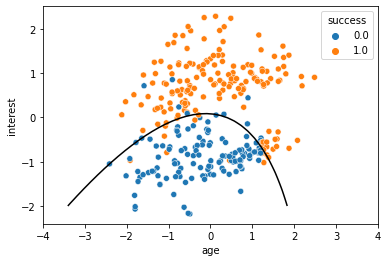

In [86]:
w, X_temp = logistic_regression_non_linear(new_data_X, new_data_Y, 2)
y_pred = logistic_pred(X_temp, w)
print(logistic_accuracy(new_data_X, new_data_Y, w, y_pred))

x = np.linspace(-4, 4)
y = np.linspace(-2, 2)
sns.scatterplot(data=data, x="age", y="interest", hue="success")


X_plot, Y_plot = np.meshgrid(x, y)
z = w[0] + w[1]*X_plot + w[2]*Y_plot + w[3]*X_plot**2 + w[4]*Y_plot**2 + w[5]*X_plot*Y_plot
plt.contour(X_plot,Y_plot, z,(0,), colors='black')

###2. Degree = 3

[0.95286195]


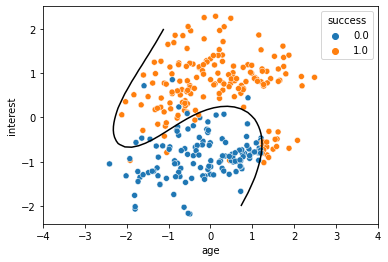

In [87]:
w, X_temp = logistic_regression_non_linear(new_data_X, new_data_Y, 3)
y_pred = logistic_pred(X_temp, w)
print(logistic_accuracy(new_data_X, new_data_Y, w, y_pred))

x = np.linspace(-4, 4)
y = np.linspace(-2, 2)
sns.scatterplot(data=data, x="age", y="interest", hue="success")


X_plot, Y_plot = np.meshgrid(x, y)
z = z = w[0] + w[1]*X_plot + w[2]*Y_plot + w[3]*X_plot**2 + w[4]*Y_plot**2 + w[5]*X_plot*Y_plot +w[6]*X_plot**3+ w[7]*Y_plot**3 + w[8]*X_plot**2*Y_plot+ w[9]*Y_plot**2*X_plot
plt.contour(X_plot,Y_plot, z,(0,), colors='black')

###3. Degree = 4

[0.95959596]


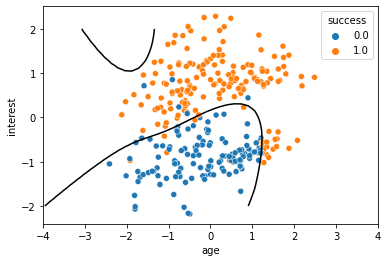

In [88]:
w, X_temp = logistic_regression_non_linear(new_data_X, new_data_Y, 4)
y_pred = logistic_pred(X_temp, w)
print(logistic_accuracy(new_data_X, new_data_Y, w, y_pred))

x = np.linspace(-4, 4)
y = np.linspace(-2, 2)
sns.scatterplot(data=data, x="age", y="interest", hue="success")


X_plot, Y_plot = np.meshgrid(x, y)
z = w[0] + w[1]*X_plot + w[2]*Y_plot + w[3]*X_plot**2 + w[4]*Y_plot**2 + w[5]*X_plot*Y_plot + w[6]*X_plot**3 + w[7]*Y_plot**3 + w[8]*X_plot**2*Y_plot + w[9]*Y_plot**2*X_plot + w[10]*X_plot**4+ w[11]*Y_plot**4 + w[12]*X_plot**3*Y_plot + w[13]*Y_plot**2*X_plot**2 + w[14]*X_plot*Y_plot**3

plt.contour(X_plot,Y_plot, z,(0,), colors='black')

#Question 2

## 1. Implement the decision tree algorithm to classify whether the income of a particular user exceeds $50K per year or not. Divide the data into two sets: Training set (80%) and validation set (20%). Plot the training error and validation error against the number of nodes present in the decision tree. Describe the optimal decision tree in your video.

In [3]:
adata = pd.read_csv('adult.csv')
adata.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
for col in adata.keys():
    if(sum(adata[col] == '?') != 0):
        adata.drop(adata[adata[col] == '?'].index, inplace=True)

adata['fnlwgt'] = adata['fnlwgt'].apply(lambda x: int(np.log1p(x)))

adata_train = adata.sample(frac=0.8)
adata_test = adata.drop(adata_train.index)

adata_train.shape, adata_test.shape, adata.head()

((36178, 15),
 (9044, 15),
    age  workclass  fnlwgt     education  educational-num      marital-status  \
 0   25    Private      12          11th                7       Never-married   
 1   38    Private      11       HS-grad                9  Married-civ-spouse   
 2   28  Local-gov      12    Assoc-acdm               12  Married-civ-spouse   
 3   44    Private      11  Some-college               10  Married-civ-spouse   
 5   34    Private      12          10th                6       Never-married   
 
           occupation   relationship   race gender  capital-gain  capital-loss  \
 0  Machine-op-inspct      Own-child  Black   Male             0             0   
 1    Farming-fishing        Husband  White   Male             0             0   
 2    Protective-serv        Husband  White   Male             0             0   
 3  Machine-op-inspct        Husband  Black   Male          7688             0   
 5      Other-service  Not-in-family  White   Male             0           

In [5]:
def att_entropy(dataF, attribute):
    target = dataF.keys()[-1]
    att_vars = dataF[attribute].unique()
    target_vars = dataF[target].unique()

    att_entropy = 0

    for att_var in att_vars:
        individual_entropy = 0

        for target_var in target_vars:
            num = len(dataF[attribute][dataF[attribute] == att_var][dataF[target] == target_var])
            den = len(dataF[attribute][dataF[attribute] == att_var])
            den += eps
            individual_entropy += -(num/den)*np.log2(num/den + eps)

        att_entropy += -(den/len(dataF))*individual_entropy
    return abs(att_entropy)


def entropy(dataF):
    target = dataF.keys()[-1]
    target_vals = dataF[target].unique()
    entropy = 0
    for val in target_vals:
        num = dataF[target].value_counts()[val]
        den = len(dataF[target])
        entropy += -(num/den)*np.log2(num/den)

    return entropy

def splitInformation(dataF, attribute):
    vals, counts = np.unique(dataF[attribute], return_counts=True)
#    split_Info = 0
#    for count in counts:
#        split_Info += -(count/sum(counts))*np.log2(count/sum(counts))
    split_Info = sum([-(count/sum(counts))*np.log2(count/sum(counts)) for count in counts])
    return split_Info

def max_IG_att(dataF):
    IG = []

    x = entropy(dataF)
    for att in dataF.keys()[:-1]:
        y = att_entropy(dataF, att)
        z = splitInformation(dataF, att)
        IG.append(np.abs(x - y)/z)
    return dataF.keys()[:-1][np.argmax(IG)]

def get_subtable(df, node,value):
  #return df[df[node] == value].reset_index(drop=True)
  return df[df[node] == value].reset_index(drop=True).drop([node], axis=1)

In [6]:
def build_DecisionTree(dataF, tree=None):

    target_var = dataF.keys()[-1]
    if(len(dataF[target_var].unique()) <= 1):
        return tree
    if(len(dataF.keys()) <=1):
        return tree    
    node = max_IG_att(dataF)

    att_vals = dataF[node].unique() ##

    if tree is None:
        tree = {}
        tree[node] = {}

    for val in att_vals:
        subtable = get_subtable(dataF, node, val)

        class_val, counts = np.unique(subtable[target_var], return_counts=True)

        if len(counts) == 1:
            tree[node][val] = class_val[0]
        else:
            tree[node][val] = build_DecisionTree(subtable)
    return tree

In [7]:
dec_tree = build_DecisionTree(adata_train, tree=None)
dec_tree

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


{'capital-gain': {0: {'capital-loss': {0: {'marital-status': {'Divorced': {'education': {'10th': {'educational-num': {6: {'workclass': {'Federal-gov': '<=50K',
            'Local-gov': '<=50K',
            'Private': '<=50K',
            'Self-emp-not-inc': {'native-country': {'United-States': {'relationship': {'Not-in-family': '<=50K',
                'Own-child': '>50K',
                'Unmarried': '<=50K'}}}},
            'State-gov': '<=50K'}}}},
        '11th': {'educational-num': {7: {'race': {'Amer-Indian-Eskimo': {'relationship': {'Unmarried': {'gender': {'Male': {'native-country': {'United-States': {'age': {46: '>50K',
                    47: '<=50K'}}}}}}}},
            'Black': '<=50K',
            'White': {'age': {19: '<=50K',
              22: '<=50K',
              23: '<=50K',
              25: '<=50K',
              26: '<=50K',
              27: '<=50K',
              28: '<=50K',
              29: '<=50K',
              30: '<=50K',
              31: '<=50K',
      

In [8]:
def make_prediction(dec_tree1, test):

    if type(dec_tree1) == str and (dec_tree1 == '<=50K' or  dec_tree1 == '>50K'):
        x = str(dec_tree1)
        return x

    x = list(dec_tree1.keys())
    feature_val = test[x[0]]
    #print(feature_val)
    #if feature_val == '<=50K' or feature_val == '>50K':
     #   return feature_val

    return make_prediction(dec_tree1[x[0]][feature_val], test)

In [10]:
count = 0
for i in range(adata_test.shape[0]):
    test = adata_test.iloc[i,:]
    pred = make_prediction(dec_tree, test)

    if pred == test['income']:
        count += 1
count/adata_test.shape[0]

KeyError: ignored

In [7]:
def build_DecisionTree_ques(dataF, n, tree=None):

  
    target_var = dataF.keys()[-1]


    if(len(dataF[target_var].unique()) <= 1):
        return tree
    if(len(dataF.keys()) <=1):
        return tree    
    node = max_IG_att(dataF)

    att_vals = dataF[node].unique() ##

    if tree is None:
        tree = {}
        tree[node] = {}

    for val in att_vals:
        subtable = get_subtable(dataF, node, val)

        class_val, counts = np.unique(subtable[target_var], return_counts=True)

        if len(counts) == 1:
            tree[node][val] = class_val[0]
        elif subtable[target_var].shape[0] <= n:
            majority = class_val[np.argmax(counts)]
            tree[node][val] = majority
        else:
            tree[node][val] = build_DecisionTree_ques(subtable,n)
    return tree

In [8]:
hehe = build_DecisionTree_ques(adata_train, 30000, tree=None)
hehe

{'capital-gain': {0: {'capital-loss': {0: {'marital-status': {'Divorced': '<=50K',
      'Married-AF-spouse': '<=50K',
      'Married-civ-spouse': '<=50K',
      'Married-spouse-absent': '<=50K',
      'Never-married': '<=50K',
      'Separated': '<=50K',
      'Widowed': '<=50K'}},
    155: '<=50K',
    213: '<=50K',
    323: '<=50K',
    419: '<=50K',
    625: '<=50K',
    653: '<=50K',
    810: '<=50K',
    880: '<=50K',
    974: '<=50K',
    1092: '<=50K',
    1138: '<=50K',
    1258: '<=50K',
    1340: '<=50K',
    1380: '<=50K',
    1408: '<=50K',
    1411: '<=50K',
    1429: '<=50K',
    1485: '>50K',
    1504: '<=50K',
    1510: '<=50K',
    1539: '<=50K',
    1564: '>50K',
    1573: '<=50K',
    1579: '<=50K',
    1590: '<=50K',
    1594: '<=50K',
    1602: '<=50K',
    1617: '<=50K',
    1628: '<=50K',
    1648: '<=50K',
    1651: '<=50K',
    1668: '<=50K',
    1669: '<=50K',
    1672: '<=50K',
    1719: '<=50K',
    1721: '<=50K',
    1726: '<=50K',
    1735: '<=50K',
    1

In [9]:
count = 0
sum = 0
for i in range(adata_test.shape[0]):
    #print(1)
    test = adata_test.iloc[i,:]
    pred = make_prediction(hehe, test)

    if pred == test['income']:
        count += 1
    sum += 1
count/adata_test.shape[0]

KeyError: ignored

In [41]:
#print(make_prediction(hehe,adata_test.iloc[665,:]))
#sum
adata_test.iloc[665,:]

age                           74
workclass                Private
fnlwgt                        11
education           Some-college
educational-num               10
marital-status          Divorced
occupation                 Sales
relationship       Not-in-family
race                       White
gender                    Female
capital-gain                7262
capital-loss                   0
hours-per-week                30
native-country     United-States
income                      >50K
Name: 3453, dtype: object

In [42]:
adata['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
        2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,  3674,
        2174, 10605, 99999,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
         991,  2036,  2050,  2961,  2228, 22040,  2936,  6360,  2009,
        3432,  1639, 18481,  2387])

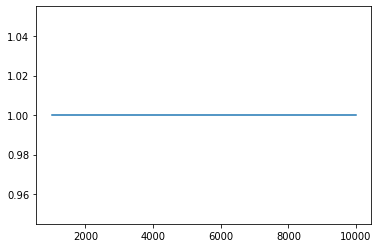

In [23]:
n = 10000
x = []
y = []
while (n>=1000):
    hehe = build_DecisionTree_ques(adata_train, 15000, tree=None)
    count = 0
    for i in range(adata_test.shape[0]):
        test = adata_test.iloc[1,:]
        pred = make_prediction(hehe, test)

        if pred == test['income']:
            count += 1
    x.append(n)
    y.append(count/adata_test.shape[0])
    n = n-1000

plt.plot(x,y)

In [19]:
adata_test.shape[0]

9044

##3. Implement PCA to find optimal number of features. Plot the error of optimal decision tree against the number of features. How many features did it require to match the performance of the tree obtained in the first part.

In [130]:
def pca(X, k):
    X = X - X.mean(axis=0)
    S = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(S)
    idxs = np.argsort((eigen_vals))[::-1]  #abs
    eigen_vals = eigen_vals[idxs]
    eigen_vecs = eigen_vecs[idxs]

    return eigen_vecs[:,:k]

In [ ]:
pca_data = pd.read_csv('adult.csv')
pca_data.head()

In [107]:
for col in pca_data.keys()[:-1]:
    if(sum(pca_data[col] == '?') != 0):
        pca_data.drop(pca_data[pca_data[col] == '?'].index, inplace=True)
pca_data.shape

(45222, 15)

In [ ]:
pca_data_X = pca_data.iloc[:,:-1]
pca_data_X

In [112]:
for col in pca_data_X.keys():
    if pca_data_X[col].dtype != 'int64':
        one_hot = pd.get_dummies(pca_data_X[col])
        pca_data_X = pca_data_X.drop(col, axis=1)
        pca_data_X = pca_data_X.join(one_hot)
pca_data_X.shape

(45222, 104)

In [113]:
pca_data_X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
U = pca(pca_data_X, 4)

X_transformed = np.matmul(pca_data_X, U)
X_transformed

,0,1,2,3
0,-226801.989857+0.000000j,66.5832240+0.0000000j,4.022849+0.000000j,40.493212+0.000000j
1,-89813.995637+0.000000j,26.3758620+0.0000000j,1.710918+0.000000j,55.091757+0.000000j
2,-336950.985055+0.000000j,98.9163450+0.0000000j,5.926713+0.000000j,44.443670+0.000000j
3,-160320.735648+0.000000j,7735.060009+0.000000j,16.276284+0.000000j,56.097425+0.000000j
5,-198692.991009+0.000000j,58.3321560+0.0000000j,3.540087+0.000000j,44.753784+0.000000j
...,...,...,...,...
48837,-257301.988516+0.000000j,75.5362430+0.0000000j,4.551010+0.000000j,41.971649+0.000000j
48838,-154373.992846+0.000000j,45.3253490+0.0000000j,2.808587+0.000000j,53.759955+0.000000j
48839,-151909.992782+0.000000j,44.6045790+0.0000000j,2.802122+0.000000j,70.345305+0.000000j
48840,-201489.991002+0.000000j,59.1502800+0.0000000j,3.548737+0.000000j,29.923602+0.000000j
